# Slicing 3D model
This notebook demonstrates the process of slicing 3D model. This is done in the following four steps.

1. Create many slices of the 3D model along a specified axis;
2. Create three orthogonal slices through the 3D model on the three cartesian planes;
3. Slice a model along a vector direction perpendicularly;
4. Slice the 3D model interactively.

### Packages

In [1]:
import os
import anndata as ad
import numpy as np
import spateo as st

/home/yao/PythonProject/Yao_packages/spateo-notebooks/three_dims_reconstruction/spateo/configuration.py:371: UserWarning: Trying to register the cmap 'fire' which already exists.
  plt.register_cmap("fire", fire_cmap)
/home/yao/PythonProject/Yao_packages/spateo-notebooks/three_dims_reconstruction/spateo/configuration.py:372: UserWarning: Trying to register the cmap 'darkblue' which already exists.
  plt.register_cmap("darkblue", darkblue_cmap)
/home/yao/PythonProject/Yao_packages/spateo-notebooks/three_dims_reconstruction/spateo/configuration.py:373: UserWarning: Trying to register the cmap 'darkgreen' which already exists.
  plt.register_cmap("darkgreen", darkgreen_cmap)
/home/yao/PythonProject/Yao_packages/spateo-notebooks/three_dims_reconstruction/spateo/configuration.py:374: UserWarning: Trying to register the cmap 'darkred' which already exists.
  plt.register_cmap("darkred", darkred_cmap)
/home/yao/PythonProject/Yao_packages/spateo-notebooks/three_dims_reconstruction/spateo/confi

### Data source

In [2]:

adata = ad.read_h5ad("/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/5_annotation/E8-10_b_all_anno_scsq.h5ad")

data_folder="/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_all_anno_scsq/1_reconstruct_whole_body/mesh"
pc = st.tl.tdr.read_model(filename=os.path.join(data_folder, "pc_model.vtk"))
voxel = st.tl.tdr.read_model(filename=os.path.join(data_folder, "voxel_model.vtk"))
########################################################################################################################
save_folder = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction"
save_cellbin_tdr_folder = os.path.join(save_folder, r"E8-10_b_all_anno_scsq")
save_cellbin_tdr_7_folder = os.path.join(save_cellbin_tdr_folder, r"7_slicing_3D_model")
save_cellbin_tdr_mesh_folder = os.path.join(save_cellbin_tdr_7_folder, r"mesh")
save_cellbin_tdr_image_folder = os.path.join(save_cellbin_tdr_7_folder, r"image")

for folder in [save_folder, save_cellbin_tdr_folder, save_cellbin_tdr_7_folder, save_cellbin_tdr_mesh_folder, save_cellbin_tdr_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

### Slicing along x axis

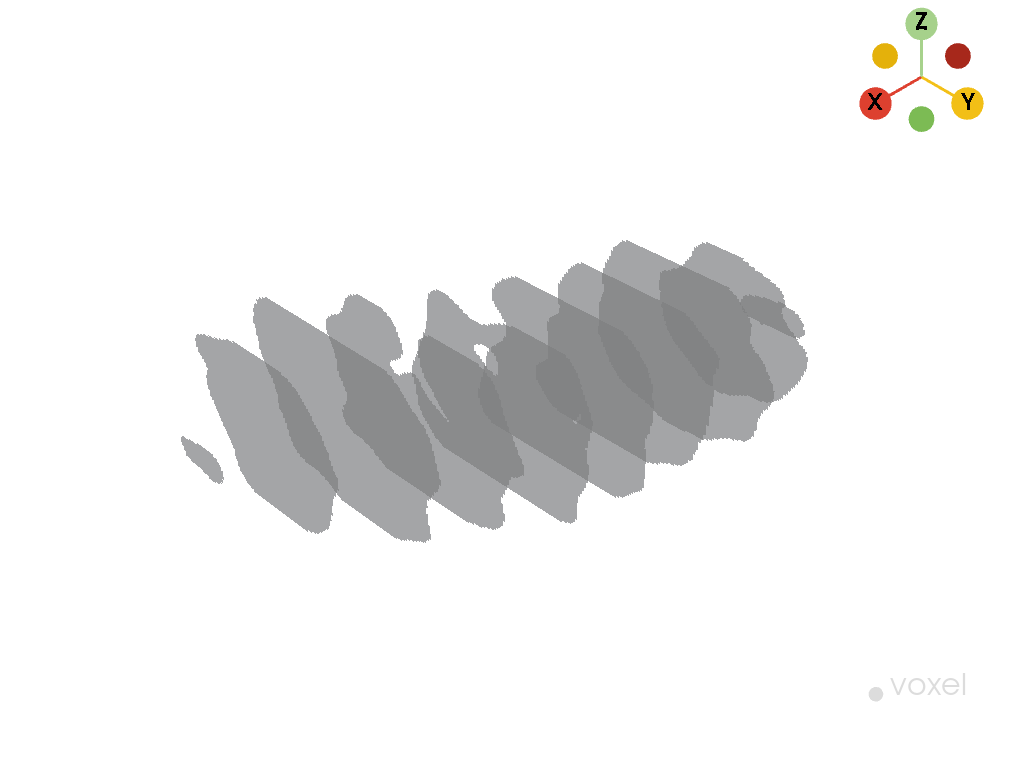

In [4]:
x_slices = st.tl.tdr.three_d_slice(model=voxel, method="axis", n_slices=10, axis="x")
st.pl.three_d_plot(model=x_slices, key="groups", jupyter="static", off_screen=True, opacity=0.7)

### Slicing along y axis

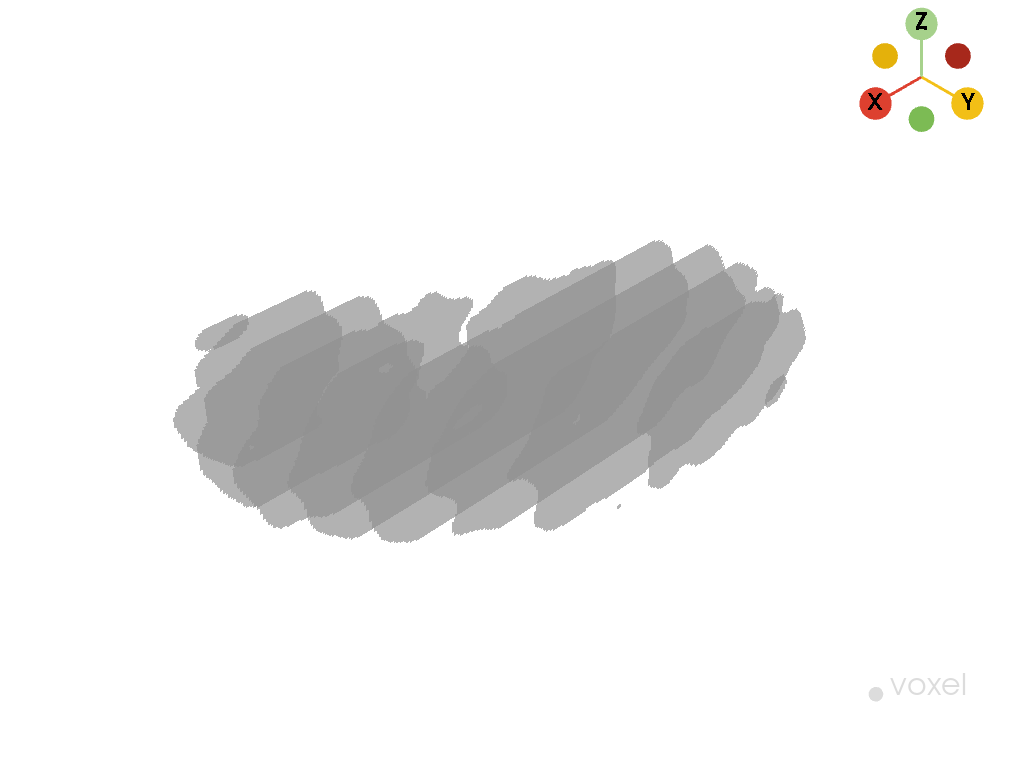

In [5]:
y_slices = st.tl.tdr.three_d_slice(model=voxel, method="axis", n_slices=10, axis="y")
st.pl.three_d_plot(model=y_slices, key="groups", jupyter="static", off_screen=True, opacity=0.7)

### Slicing along z axis

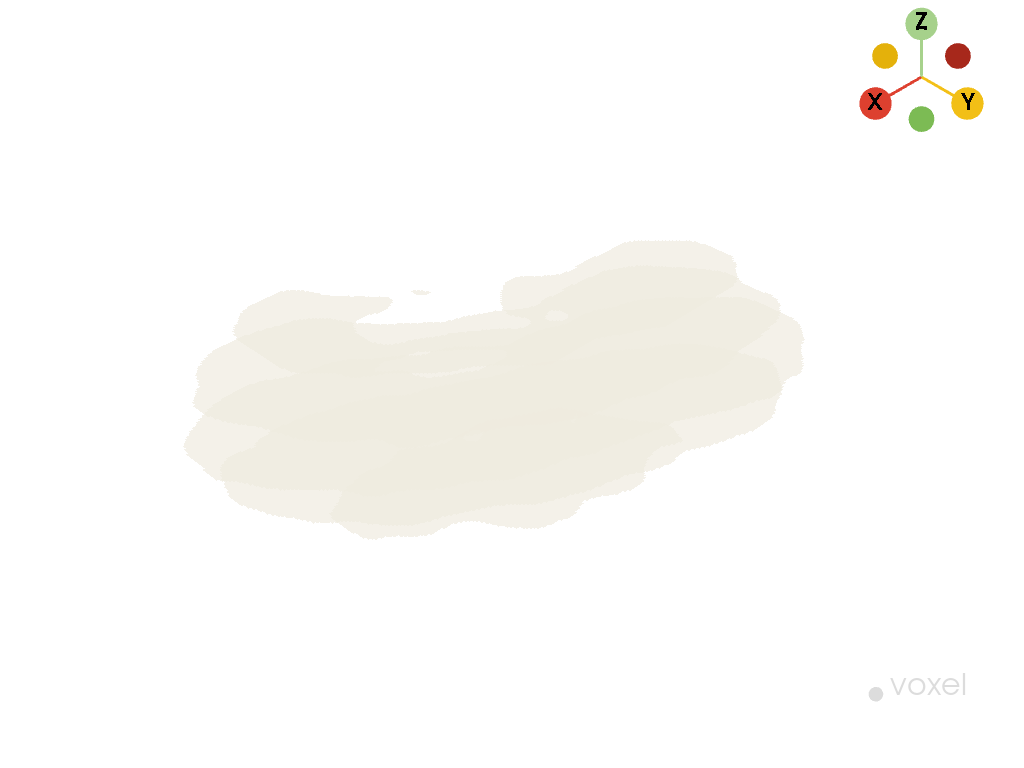

In [8]:
z_slices = st.tl.tdr.three_d_slice(model=voxel, method="axis", n_slices=5, axis="z")
st.pl.three_d_plot(model=z_slices, key="groups", jupyter="static", off_screen=True, opacity=0.7)

### Orthogonal slicing

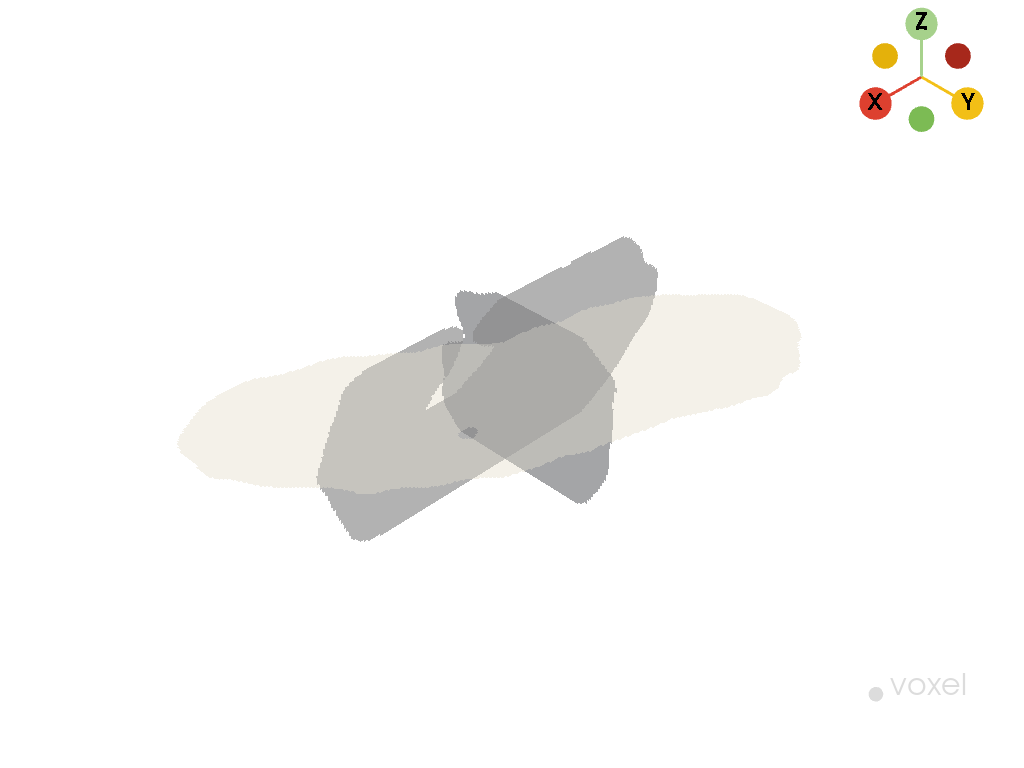

In [9]:
orthogonal_slices = st.tl.tdr.three_d_slice(model=voxel, method="orthogonal", center=None)
st.pl.three_d_plot(model=orthogonal_slices, key="groups", jupyter="static", off_screen=True, opacity=0.7)

### Slicing along any vector direction

|-----> Slice the model uniformly along the vector `vec` and generate 5 slices. There are 0 empty slices, 5 valid slices in all slices.


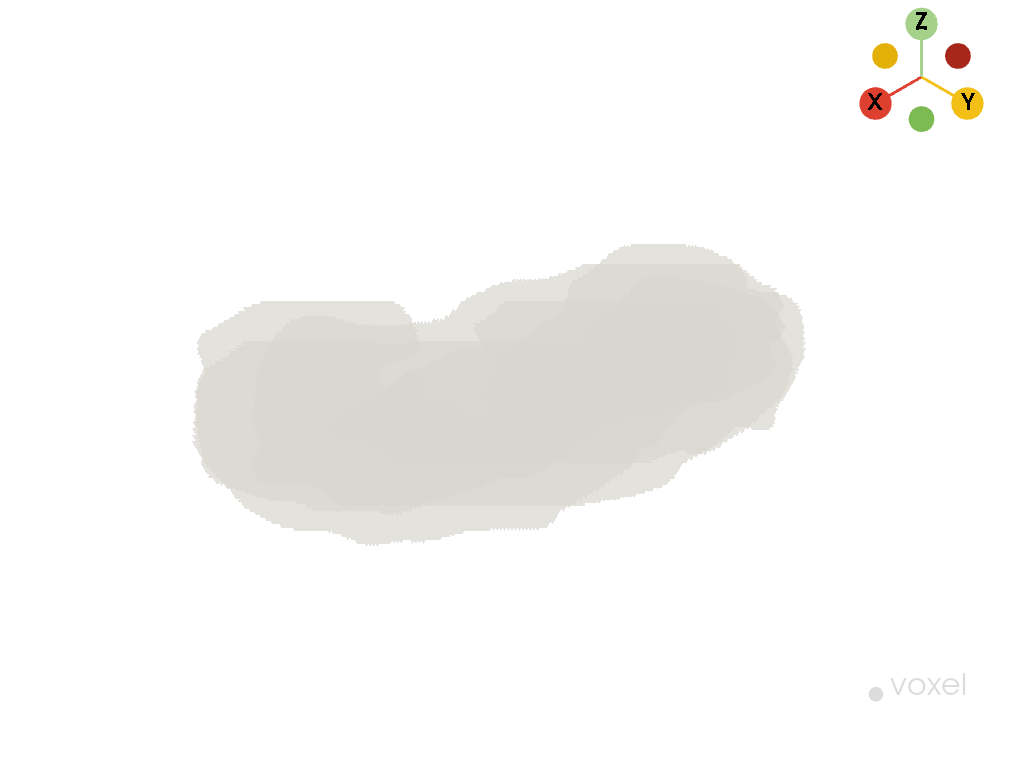

In [13]:
line_slices, line_points, line = st.tl.tdr.three_d_slice(model=voxel, method="line", center=None, vec=(1, 1, 1), n_slices=5)
st.pl.three_d_plot(model=line_slices, key="groups", jupyter="static", off_screen=True, opacity=0.7)

### Slicing interactively

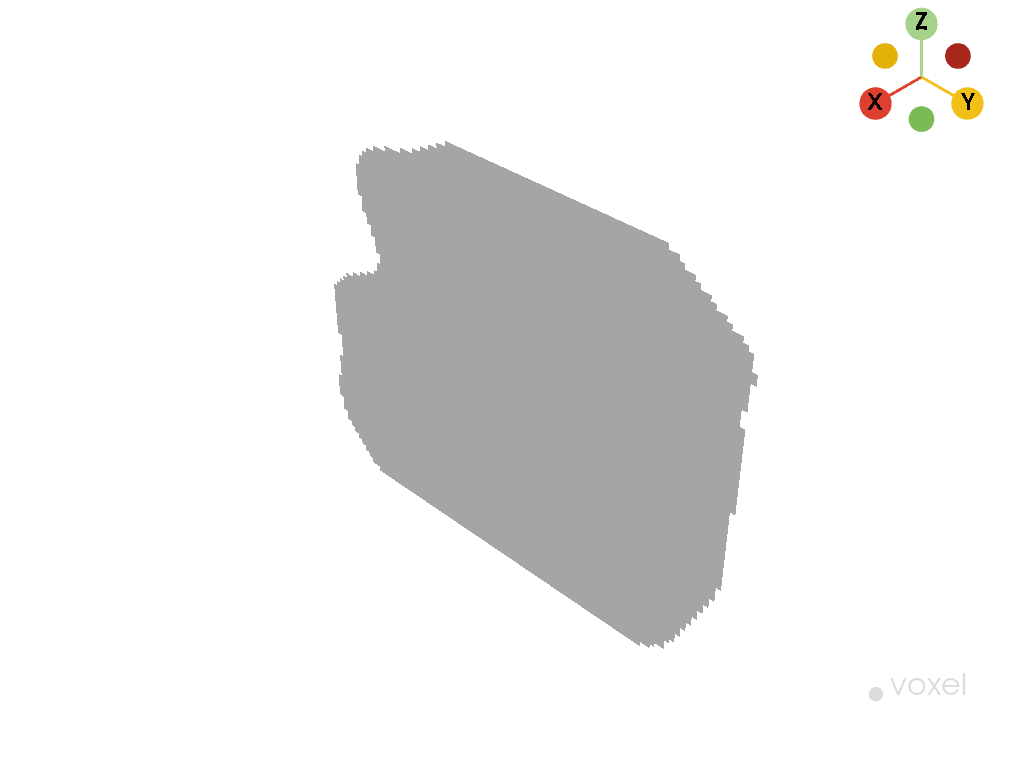

In [15]:
i_axis_slices = st.tl.tdr.interactive_slice(model=voxel, method="axis")
st.pl.three_d_plot(model=i_axis_slices, key="groups", jupyter="static", off_screen=True, opacity=0.7)

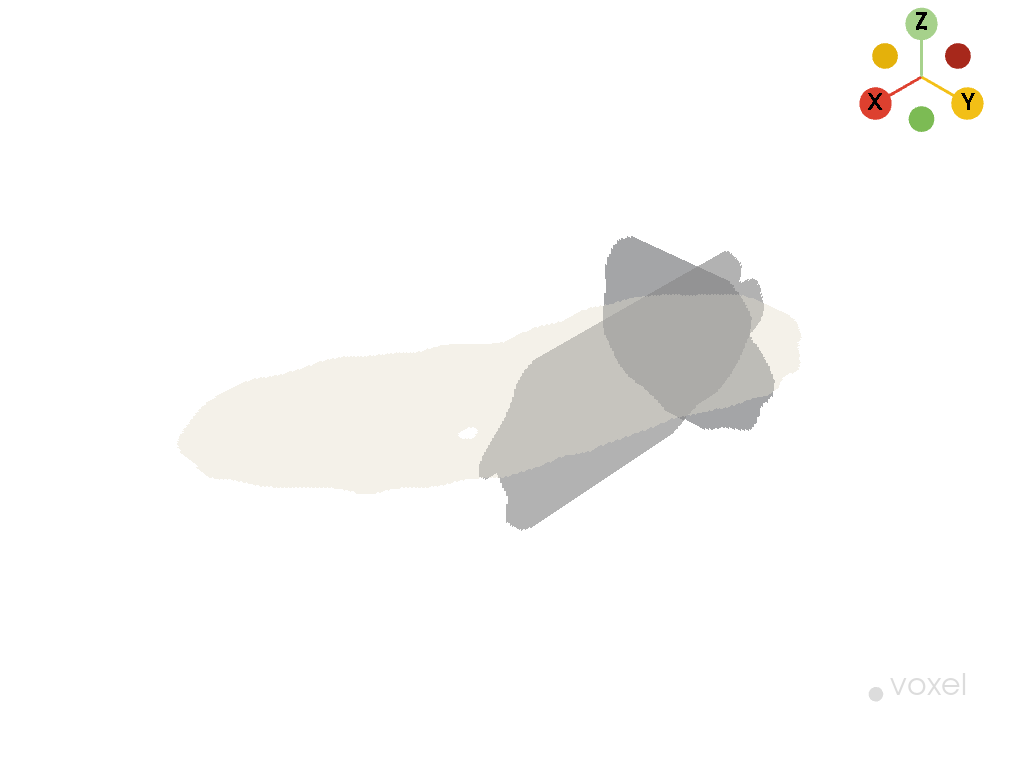

In [14]:
i_orthogonal_slices = st.tl.tdr.interactive_slice(model=voxel, method="orthogonal")
st.pl.three_d_plot(model=i_orthogonal_slices, key="groups", jupyter="static", off_screen=True, opacity=0.7)